# Capstone Project 1: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [4]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query
from scipy.stats import chi2_contingency


In [5]:
# Here's an example of a query that just displays some data
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [7]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [8]:
# Examine visits here
sql_query('''
select * 
from visits
limit 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [9]:
# Examine fitness_tests here
sql_query('''
select * 
from fitness_tests
limit 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [10]:
# Examine applications here
sql_query('''
select * 
from applications
limit 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [11]:
# Examine purchases here
sql_query('''
select * 
from purchases
limit 5
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [12]:
df = sql_query('''
SELECT visits.first_name
,visits.last_name
,visits.gender
,visits.email
,visits.visit_date
,fitness_tests.fitness_test_date
,applications.application_date
,purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests on fitness_tests.first_name = visits.first_name
AND fitness_tests.last_name = visits.last_name
AND fitness_tests.email = visits.email
LEFT JOIN applications on applications.first_name = visits.first_name
AND applications.last_name = visits.last_name
AND applications.email = visits.email
LEFT JOIN purchases on purchases.first_name = visits.first_name
AND purchases.last_name = visits.last_name
AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')
print(df.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date  
0        2017-07-03             None          None  
1        2017-07-02             None          None  
2              None       2017-07-04    2017-07-04  
3        2017-07-01       2017-07-03    2017-07-05  
4        2017-07-02             None          None  


## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [14]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda fd: 'B' if pd.isnull(fd) else 'A')
print(df.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  
0        2017-07-03             None          None             A  
1        2017-07-02             None          None             A  
2              None       2017-07-04    2017-07-04             B  
3        2017-07-01       2017-07-03    2017-07-05             A  
4        2017-07-02             None          None             A  


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [15]:
ab_counts = df.groupby('ab_test_group').ab_test_group.count()
print(ab_counts)

ab_test_group
A    2504
B    2500
Name: ab_test_group, dtype: int64


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

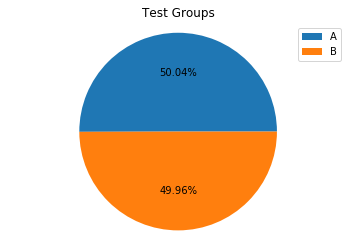

In [16]:
plt.pie(ab_counts, autopct='%.2f%%')
plt.axis('equal')
plt.legend(ab_counts.index)
plt.title('Test Groups')
plt.show()
plt.savefig('ab_test_pie_chart.png')

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [17]:
df['is_application'] = df.application_date.apply(lambda ad: 'No Application' if pd.isnull(ad) \
    else 'Application')
print(df.head())

  first_name last_name  gender                   email visit_date  \
0        Kim    Walter  female   KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male        TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male  Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male  Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female      RB6305@hotmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03             None          None             A   
1        2017-07-02             None          None             A   
2              None       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02             None          None             A   

   is_application  
0  No Application  
1  No Application  
2     Application  
3     Application  
4  No Application  


Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [18]:
app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()
#app_counts.
print(app_counts)


  ab_test_group  is_application  first_name
0             A     Application         250
1             A  No Application        2254
2             B     Application         325
3             B  No Application        2175


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [19]:
app_pivot = app_counts.pivot(
    columns='is_application',
    index='ab_test_group',
    values='first_name').reset_index()
print(app_pivot)


is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [20]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
print(app_pivot)

is_application ab_test_group  Application  No Application  Total
0                          A          250            2254   2504
1                          B          325            2175   2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [21]:
app_pivot['Percent with Application'] = app_pivot['Application'] / app_pivot['Total']
print(app_pivot)

is_application ab_test_group  Application  No Application  Total  \
0                          A          250            2254   2504   
1                          B          325            2175   2500   

is_application  Percent with Application  
0                                0.09984  
1                                0.13000  


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [22]:

X = [[250, 2254],
     [325, 2175]]
chi2, pval1, dof, expected = chi2_contingency(X)
print(pval1)

0.0009647827600722304


## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [23]:
df['is_member'] = df.purchase_date.apply(lambda p: 'Not Member' if pd.isnull(p) else 'Member')
print(df.head(10))

  first_name last_name  gender                       email visit_date  \
0        Kim    Walter  female       KimWalter58@gmail.com     7-1-17   
1        Tom   Webster    male            TW3857@gmail.com     7-1-17   
2     Edward     Bowen    male      Edward.Bowen@gmail.com     7-1-17   
3     Marcus     Bauer    male      Marcus.Bauer@gmail.com     7-1-17   
4    Roberta      Best  female          RB6305@hotmail.com     7-1-17   
5     Joseph     Foley    male     JosephFoley81@gmail.com     7-1-17   
6     Carrie   Francis  female          CF1896@hotmail.com     7-1-17   
7     Sharon   William  female  Sharon.William@outlook.com     7-1-17   
8     Teresa     Yates  female        TYates1988@gmail.com     7-1-17   
9   Salvador  Cardenas    male     SCardenas1980@gmail.com     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03             None          None             A   
1        2017-07-02             None          None          

Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [24]:
just_apps = df[df.is_application == 'Application']
print(just_apps.head())

   first_name last_name  gender                    email visit_date  \
2      Edward     Bowen    male   Edward.Bowen@gmail.com     7-1-17   
3      Marcus     Bauer    male   Marcus.Bauer@gmail.com     7-1-17   
9    Salvador  Cardenas    male  SCardenas1980@gmail.com     7-1-17   
11    Valerie     Munoz  female     VMunoz1998@gmail.com     7-1-17   
35    Michael     Burks    male         MB9820@gmail.com     7-1-17   

   fitness_test_date application_date purchase_date ab_test_group  \
2               None       2017-07-04    2017-07-04             B   
3         2017-07-01       2017-07-03    2017-07-05             A   
9         2017-07-07       2017-07-06          None             A   
11        2017-07-03       2017-07-05    2017-07-06             A   
35              None       2017-07-07    2017-07-13             B   

   is_application   is_member  
2     Application      Member  
3     Application      Member  
9     Application  Not Member  
11    Application      Member 

Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [25]:
member_p = just_apps.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

member_pivot = member_p.pivot(
               columns = 'is_member',
               index = 'ab_test_group',
               values = 'first_name'
).reset_index()

member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']

member_pivot['Percent Purchase'] = member_pivot['Member'] / member_pivot['Total']
print(member_pivot)




is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200          50    250          0.800000
1                     B     250          75    325          0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [26]:
X = [[200, 50],
     [250, 75]]
chi2, pval2, dof, expected = chi2_contingency(X)
print(pval2)

0.43258646051083327


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [27]:
final_member = df.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

final_member_pivot = final_member.pivot(
                                        columns = 'is_member',
                                        index = 'ab_test_group',
                                        values = 'first_name'
).reset_index()

final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']

final_member_pivot['Percent Purchased'] = final_member_pivot['Member'] / final_member_pivot['Total']
print(final_member_pivot)




is_member ab_test_group  Member  Not Member  Total  Percent Purchased
0                     A     200        2304   2504           0.079872
1                     B     250        2250   2500           0.100000


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [28]:
X = [[200, 2304],
     [250, 2250]]
chi2, pval3, dof, expected = chi2_contingency(X)
print(pval3)

0.014724114645783203


## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

2


Text(0.5,1,'Test')

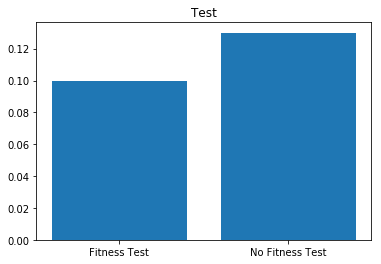

In [34]:
print(len(app_pivot))
ax = plt.subplot()
plt.bar(range(len(app_pivot)), app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
plt.title('Test')